---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [13]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    
    return df[df['Class']==1].shape[0]/df.shape[0]
answer_one()

0.016410823768035772

In [74]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [16]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy.predict(X_test)

    return (dummy.score(X_test, y_test),recall_score(y_test,y_dummy_predictions))
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [18]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    
    return (svm.score(X_test, y_test), recall_score(y_test,y_pred),precision_score(y_test,y_pred))
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

Text(0.5, 1.0, 'Precision-Recall Curve')

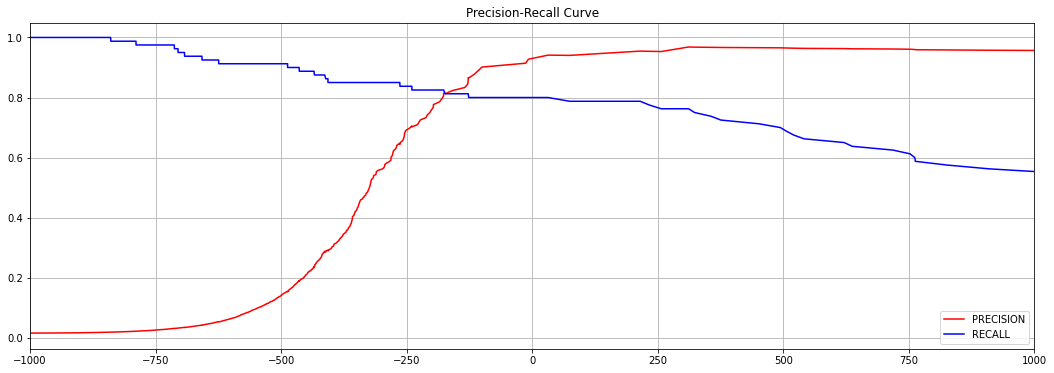

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

svm = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
decision_function = svm.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test, decision_function)

# Plot the output.
plt.figure(figsize=(18,6))
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.xlim(left=-1000)
plt.xlim(right=1000)
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In [29]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score

    svm = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
    y_pred= (svm.decision_function(X_test))>=-220
    print('Accuracy: {:.2f} y Recall: {:.2f}'.format(accuracy_score(y_test, y_pred),recall_score(y_test, y_pred)))
    return confusion_matrix(y_test, y_pred)
answer_four()

Accuracy: 0.99 y Recall: 0.82


array([[5320,   24],
       [  14,   66]], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

svm = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
y_pred= (svm.decision_function(X_test))>=150
print('Accuracy: {:.2f} y Recall: {:.2f}'.format(accuracy_score(y_test, y_pred),recall_score(y_test, y_pred)))
confusion_matrix(y_test, y_pred)


Accuracy: 1.00 y Recall: 0.79


array([[5341,    3],
       [  17,   63]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

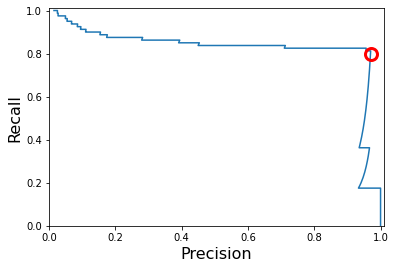

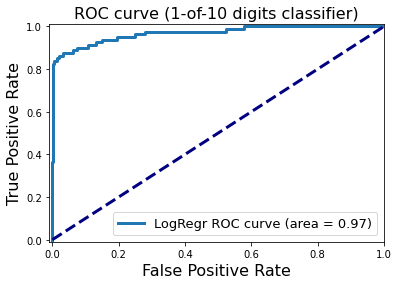

(0.825, 0.9)

In [46]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression(max_iter=1000)
    y_scores= log_reg.fit(X_train, y_train).decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    recall075 = float(recall[np.where(precision==0.75)])

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.show()

    #ROC curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.show()
    
    return (recall075,0.9)
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [75]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression(max_iter=1000)
    grid_param= {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    grid = GridSearchCV(log_reg, param_grid = grid_param,scoring='recall',cv=3, n_jobs =1)
    grid.fit(X_train, y_train)
    mean_score=grid.cv_results_["mean_test_score"].reshape(5,2)
    return mean_score
answer_six()

c:\Users\aghelfi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aghelfi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------------

array([[       nan, 0.79347826],
       [       nan, 0.80797101],
       [       nan, 0.80797101],
       [       nan, 0.80797101],
       [       nan, 0.80797101]])

c:\Users\aghelfi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aghelfi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------------

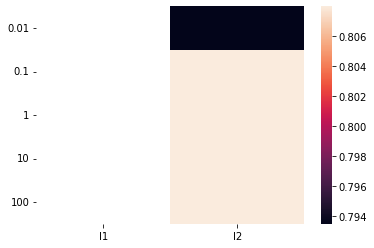

In [76]:
# Use the following function to help visualize results from the grid search

def GridSearch_Heatmap(scores):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())